In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import illustris_python as il

In [3]:
def Distance_1D(X, X_POS, BoxSize):
    '''This function takes as input a 1D 
    vector containing the positions of particles, 
    the X_POS(float) that is the position respect 
    to where we will compute the Distance and the BoxSize, 
    this function consider a periodical Box. 
    The output is a 1D vector with the same size than X 
    containing the distance from X to X_POS
    example:
        xc = Distance_1D(pos[gals,0], pos[central,0], (75000/h))
        yc = Distance_1D(pos[gals,1], pos[central,1], (75000/h))
        zc = Distance_1D(pos[gals,2], pos[central,2], (75000/h))
        # with the aim of use of the normpos
        normpos = np.sqrt(xc**2 + yc**2 + zc**2)/r200[group]
    '''
    
    D=X-X_POS
    D=np.where(D>BoxSize/2, D-BoxSize, D)
    D=np.where(D<-BoxSize/2, D+BoxSize, D)
    return D

In [4]:
basePath = '/home/tnguser/sims.TNG/TNG100-1/output'
fields = ['Group_R_Crit200', 'GroupSFR', 'GroupMassType', 'GroupPos']
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [5]:
fields = ['SubhaloMass','SubhaloSFRinRad','SubhaloSFR' ,
          'SubhaloStellarPhotometrics', 'SubhaloMassType', 
          'SubhaloGrNr', 'SubhaloPos']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)

In [6]:
h = 0.6774

In [7]:
df_groups = pd.read_pickle('../generate_catalog/group_number_cat.pkl')

In [8]:
df_sats_05 = pd.read_pickle('../generate_catalog/satellites_cat/sample_at_05.pkl')
df_sats_1 = pd.read_pickle('../generate_catalog/satellites_cat/sample_at_1.pkl')

In [9]:
df_sats_05['galaxy']

0            0
1            1
2            2
3            3
4            4
         ...  
3606    327115
3607    330553
3608    330554
3609    330555
3610    330556
Name: galaxy, Length: 3611, dtype: int64

## testing for one halo

In [10]:
id_sats_group_0 = np.where(df_sats_05['group_index']==0)[0]
sats = df_sats_05['galaxy']
sats_group_0 = sats[id_sats_group_0]
id_central_group_0 = sats_group_0[sats_group_0.index[0]]
id_sats_group_0 = sats_group_0[sats_group_0.index[1:]]                              

In [11]:
pos_sats_group_0 = subhalos['SubhaloPos'][id_sats_group_0]/h
pos_central_group_0 = subhalos['SubhaloPos'][id_central_group_0]/h

In [12]:
x = pos_sats_group_0[:, 0]
y = pos_sats_group_0[:, 1]
z = pos_sats_group_0[:, 2]
r200_group_0 = halos['Group_R_Crit200'][df_groups['05FossilR200'][0]]/h

In [13]:
xc = Distance_1D(x, pos_central_group_0[0], (75000/h))
yc = Distance_1D(y, pos_central_group_0[1], (75000/h))
zc = Distance_1D(z, pos_central_group_0[2], (75000/h))
        
normpos_group_0 = np.sqrt(xc**2 + yc**2 + zc**2)/r200_group_0

pos_inside_05 = normpos_group_0[np.where(normpos_group_0 <= 0.5)[0]]
id_inside_05 = np.where(normpos_group_0 <= 0.5)[0]

In [14]:
ssfr_group_0 = subhalos['SubhaloSFR'][id_sats_group_0]

Text(0, 0.5, 'SFR')

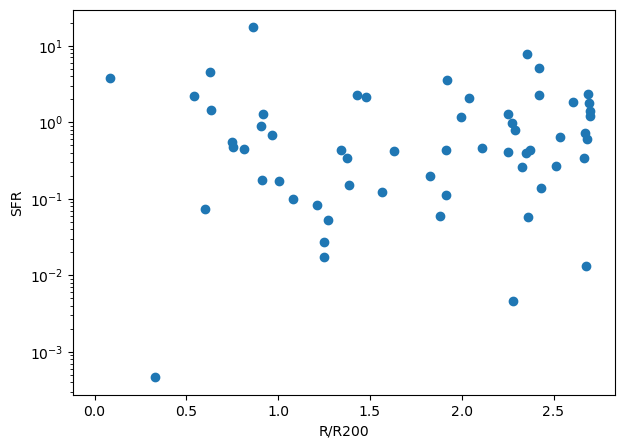

In [15]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.scatter(normpos_group_0, ssfr_group_0)
ax.set_yscale('log')
ax.set_xlabel('R/R200')
ax.set_ylabel('SFR')

## testing for one halo NF

In [16]:
id_sats_group_2 = np.where(df_sats_05['group_index']==2)[0]
sats = df_sats_05['galaxy']
sats_group_2 = sats[id_sats_group_2]
id_central_group_2 = sats_group_2[sats_group_2.index[0]]
id_sats_group_2 = sats_group_2[sats_group_2.index[1:]]

In [17]:
pos_sats_group_2 = subhalos['SubhaloPos'][id_sats_group_2]/h
pos_central_group_2 = subhalos['SubhaloPos'][id_central_group_2]/h

In [18]:
x = pos_sats_group_2[:, 0]
y = pos_sats_group_2[:, 1]
z = pos_sats_group_2[:, 2]
r200_group_2 = halos['Group_R_Crit200'][df_groups['05FossilR200'][0]]/h

In [19]:
xc = Distance_1D(x, pos_central_group_2[0], (75000/h))
yc = Distance_1D(y, pos_central_group_2[1], (75000/h))
zc = Distance_1D(z, pos_central_group_2[2], (75000/h))
        
normpos_group_2 = np.sqrt(xc**2 + yc**2 + zc**2)/r200_group_2

pos_inside_05 = normpos_group_2[np.where(normpos_group_2 <= 0.5)[0]]
id_inside_05 = np.where(normpos_group_2 <= 0.5)[0]

In [20]:
ssfr_group_2 = subhalos['SubhaloSFR'][id_sats_group_2]

Text(0, 0.5, 'SFR')

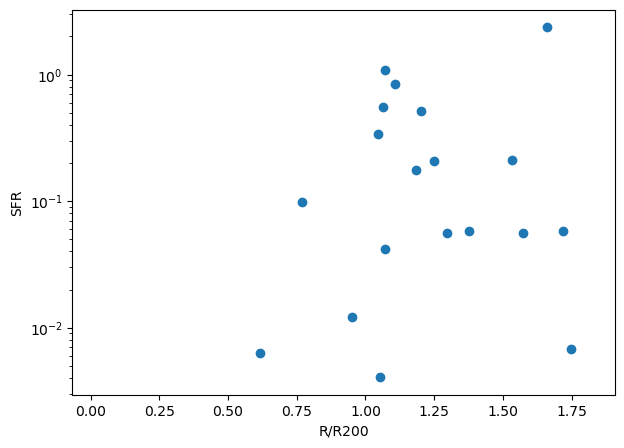

In [21]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.scatter(normpos_group_2, ssfr_group_2)
ax.set_yscale('log')
ax.set_xlabel('R/R200')
ax.set_ylabel('SFR')

# testing for all the satellite galaxies

In [22]:
F05r200 = df_groups['05FossilR200']
NF05r200 = df_groups['05NFossilR200']

In [23]:
Fr200 = df_groups['1FossilR200']
NFr200 = df_groups['1NFossilR200']

In [24]:
stellar_mass_05 = df_sats_05['satellite_mass']

## specific star formation rate and QF for 05

In [25]:
threshold = 1e-11

In [26]:
F05sSFR_dict = {}
NF05sSFR_dict = {}

box_size = 75000 / h  # tamaño de caja en Mpc/h

# Fósiles
for group_id in F05r200:
    group = np.where(df_sats_05['group_index'] == group_id)[0]
    F05sSFR_dict[group_id] = []
    sats = df_sats_05['galaxy']
    sats_group = sats[group]
    id_central_group = sats_group[sats_group.index[0]]
    id_sats_group = sats_group[sats_group.index[1:]]

    r200 = halos['Group_R_Crit200'][group_id] / h
    central_pos = subhalos['SubhaloPos'][id_central_group] / h

    for subhalo_id in id_sats_group:  # skip central
        pos = subhalos['SubhaloPos'][subhalo_id] / h
        xc = Distance_1D(pos[0], central_pos[0], box_size)
        yc = Distance_1D(pos[1], central_pos[1], box_size)
        zc = Distance_1D(pos[2], central_pos[2], box_size)
        r_norm = np.sqrt(xc**2 + yc**2 + zc**2) / r200

        sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])
        F05sSFR_dict[group_id].append({
            'subhalo_id': int(subhalo_id),
            'sSFR': np.float64(sSFR),
            'Rnorm': float(r_norm)
        })

# No-fósiles
for group_id in NF05r200:
    group = np.where(df_sats_05['group_index'] == group_id)[0]
    NF05sSFR_dict[group_id] = []
    sats = df_sats_05['galaxy']
    sats_group = sats[group]
    id_central_group = sats_group[sats_group.index[0]]
    id_sats_group = sats_group[sats_group.index[1:]]

    r200 = halos['Group_R_Crit200'][group_id] / h
    central_pos = subhalos['SubhaloPos'][id_central_group] / h

    for subhalo_id in id_sats_group:
        pos = subhalos['SubhaloPos'][subhalo_id] / h
        xc = Distance_1D(pos[0], central_pos[0], box_size)
        yc = Distance_1D(pos[1], central_pos[1], box_size)
        zc = Distance_1D(pos[2], central_pos[2], box_size)
        r_norm = np.sqrt(xc**2 + yc**2 + zc**2) / r200

        sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])

        NF05sSFR_dict[group_id].append({
            'subhalo_id': int(subhalo_id),
            'sSFR': np.float64(sSFR),
            'Rnorm': float(r_norm)
        })


In [27]:
F05QF_dict = {}

for group_id in F05r200:
    group_measuring = F05sSFR_dict[group_id]
    sSFR_vals = []
    for subhalo in group_measuring:
        sSFR = subhalo['sSFR']
        sSFR_vals.append(sSFR)
        if len(sSFR_vals) > 0:
            quenched = np.sum(np.array(sSFR_vals) < threshold)
            QF = quenched / len(sSFR_vals)
        else:
            QF = np.nan
        # Agregamos al diccionario
        F05QF_dict[group_id] = {
            'group_id': group_id,
            'QF': QF
        }
        
        
NF05QF_dict = {}

for group_id in NF05r200:
    group_measuring = NF05sSFR_dict[group_id]
    sSFR_vals = []
    for subhalo in group_measuring:
        sSFR = subhalo['sSFR']
        sSFR_vals.append(sSFR)
        if len(sSFR_vals) > 0:
            quenched = np.sum(np.array(sSFR_vals) < threshold)
            QF = quenched / len(sSFR_vals)
        else:
            QF = np.nan
        # Agregamos al diccionario again
        NF05QF_dict[group_id] = {
            'group_id': group_id,
            'QF': QF
        }

## specific star formation rate and QF for 1

In [28]:
F1sSFR_dict = {}
NF1sSFR_dict = {}

# Fósiles
for group_id in Fr200:
    group = np.where(df_sats_1['group_index'] == group_id)[0]
    F1sSFR_dict[group_id] = []
    sats = df_sats_05['galaxy']
    sats_group = sats[group]
    id_central_group = sats_group[sats_group.index[0]]
    id_sats_group = sats_group[sats_group.index[1:]]

    r200 = halos['Group_R_Crit200'][group_id] / h
    central_pos = subhalos['SubhaloPos'][id_central_group] / h
    for subhalo_id in id_sats_group:
        pos = subhalos['SubhaloPos'][subhalo_id] / h
        xc = Distance_1D(pos[0], central_pos[0], box_size)
        yc = Distance_1D(pos[1], central_pos[1], box_size)
        zc = Distance_1D(pos[2], central_pos[2], box_size)
        r_norm = np.sqrt(xc**2 + yc**2 + zc**2) / r200

        sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])
        F1sSFR_dict[group_id].append({
            'subhalo_id': int(subhalo_id),
            'sSFR': np.float64(sSFR),
            'Rnorm': float(r_norm)
        })

# No-fósiles
for group_id in NFr200:
    group = np.where(df_sats_05['group_index'] == group_id)[0]
    NF1sSFR_dict[group_id] = []
    sats = df_sats_05['galaxy']
    sats_group = sats[group]
    id_central_group = sats_group[sats_group.index[0]]
    id_sats_group = sats_group[sats_group.index[1:]]

    r200 = halos['Group_R_Crit200'][group_id] / h
    central_pos = subhalos['SubhaloPos'][id_central_group] / h

    for subhalo_id in id_sats_group:
        pos = subhalos['SubhaloPos'][subhalo_id] / h
        xc = Distance_1D(pos[0], central_pos[0], box_size)
        yc = Distance_1D(pos[1], central_pos[1], box_size)
        zc = Distance_1D(pos[2], central_pos[2], box_size)
        r_norm = np.sqrt(xc**2 + yc**2 + zc**2) / r200

        sSFR = (h / 10**10) * (subhalos['SubhaloSFR'][subhalo_id] / subhalos['SubhaloMassType'][subhalo_id, 4])
        NF1sSFR_dict[group_id].append({
            'subhalo_id': int(subhalo_id),
            'sSFR': np.float64(sSFR),
            'Rnorm': float(r_norm)
        })


In [29]:
F1QF_dict = {}

for group_id in Fr200:
    group_measuring = F1sSFR_dict[group_id]
    sSFR_vals = []
    for subhalo in group_measuring:
        sSFR = subhalo['sSFR']
        sSFR_vals.append(sSFR)
        if len(sSFR_vals) > 0:
            quenched = np.sum(np.array(sSFR_vals) < threshold)
            QF = quenched / len(sSFR_vals)
        else:
            QF = np.nan
        # Agregamos como nueva entrada en el diccionario
        F1QF_dict[group_id] = {
            'group_id': group_id,
            'QF': QF
        }
        
        
NF1QF_dict = {}

for group_id in NFr200:
    group_measuring = NF1sSFR_dict[group_id]
    sSFR_vals = []
    for subhalo in group_measuring:
        sSFR = subhalo['sSFR']
        sSFR_vals.append(sSFR)
        if len(sSFR_vals) > 0:
            quenched = np.sum(np.array(sSFR_vals) < threshold)
            QF = quenched / len(sSFR_vals)
        else:
            QF = np.nan
        # Agregamos como nueva entrada en el diccionario
        NF1QF_dict[group_id] = {
            'group_id': group_id,
            'QF': QF
        }

In [30]:
QF_05_list = []
for key in F05QF_dict.items():
    QF_05_list.append(key[1]['QF'])

In [31]:
QF_NF05_list = []
for key in NF05QF_dict.items():
    QF_NF05_list.append(key[1]['QF'])

In [32]:
medianQF = np.median(QF_05_list)
mediannQF = np.median(QF_NF05_list)
meanQF = np.mean(QF_05_list)
meannQF = np.mean(QF_NF05_list)

In [33]:
QF_1_list = []
for key in F1QF_dict.items():
    QF_1_list.append(key[1]['QF'])

In [35]:
QF_NF1_list = []
for key in NF1QF_dict.items():
    QF_NF1_list.append(key[1]['QF'])

In [36]:
medianQF = np.median(QF_1_list)
mediannQF = np.median(QF_NF1_list)
meanQF = np.mean(QF_1_list)
meannQF = np.mean(QF_NF1_list)

In [37]:
weight_fossil = np.ones_like(QF_05_list)/len(F05r200)
weight_nonfossil = np.ones_like(QF_NF05_list)/len(NF05r200)
#bins= np.arange(0, 1, 0.025)
bins= int(1 + np.log2(len(F05r200)+len(NF05r200)))

In [38]:
weight_fossil_1 = np.ones_like(QF_1_list)/len(Fr200)
weight_nonfossil_1 = np.ones_like(QF_NF1_list)/len(NFr200)
#bins= np.arange(0, 1, 0.025)
bins_1 = int(1 + np.log2(len(Fr200)+len(NFr200)))

Text(0.5, 0.01, 'quenching fraction (% of quenched galaxies per halo)')

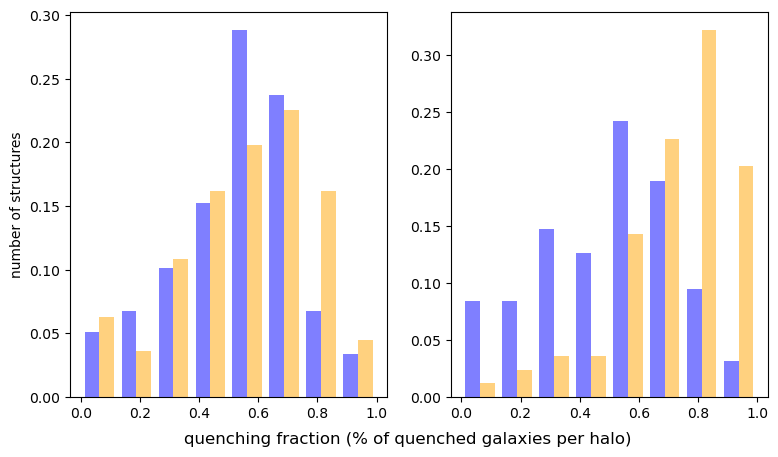

In [39]:
fig, ax = plt.subplots(1,2, figsize=(9,5))

ax[0].hist([QF_NF05_list,QF_05_list], bins=bins, color = ['blue', 'orange'], 
           rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], 
           weights = [weight_nonfossil, weight_fossil], cumulative=False)
ax[1].hist([QF_NF1_list,QF_1_list], bins=bins, color = ['blue', 'orange'], 
           rwidth=0.8, alpha=0.5, label=['Non fossil', 'Fossil'], 
           weights = [weight_nonfossil_1, weight_fossil_1], cumulative=False)

ax[0].set_ylabel('number of structures')
fig.supxlabel('quenching fraction (% of quenched galaxies per halo)')


In [40]:
df_05 = pd.DataFrame({
    'QF': QF_NF05_list + QF_05_list,
    'state': ['no-fósil'] * len(QF_NF05_list) + ['fósil'] * len(QF_05_list)
})

df_1 = pd.DataFrame({
    'QF': QF_NF1_list + QF_1_list,
    'state': ['no-fósil'] * len(QF_NF1_list) + ['fósil'] * len(QF_1_list)
})

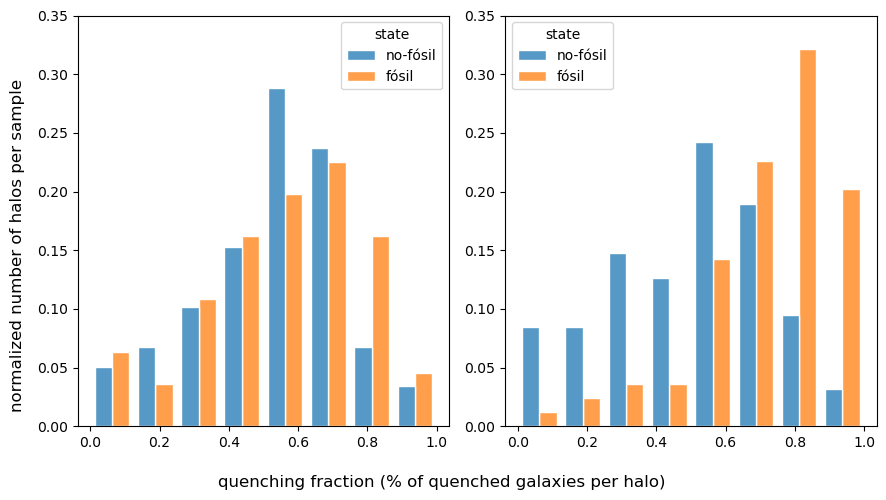

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data=df_05, x='QF', hue='state', 
             bins=bins, stat='proportion', element='bars', 
             common_norm=False, ax=ax[0], multiple='dodge', 
             shrink=0.8, edgecolor='white')

sns.histplot(data=df_1, x='QF', hue='state',
             bins=bins, stat='proportion', element='bars',
             common_norm=False, ax=ax[1], multiple='dodge', 
             shrink=0.8, edgecolor='white')

# Quitar etiquetas de ejes individuales
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_ylim(0,0.35)

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(0,0.35)
# Etiqueta común en el eje x
fig.supylabel('normalized number of halos per sample')
fig.supxlabel('quenching fraction (% of quenched galaxies per halo)')

plt.tight_layout()
plt.show()


## cumulative quenching fraction

In [42]:
binsnf = np.linspace(0, 1, num=len(QF_NF05_list))
binsf = np.linspace(0, 1, num=len(QF_05_list))

binsnf1 = np.linspace(0, 1, num=len(QF_NF1_list))
binsf1 = np.linspace(0, 1, num=len(QF_1_list))

In [43]:
bins= np.linspace(0, 1, num=50)

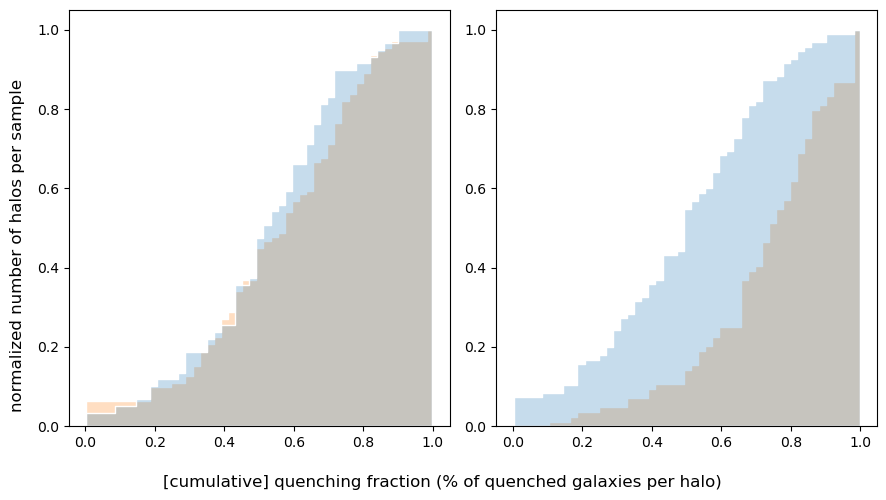

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data=df_05, x='QF', hue='state', 
             bins=bins, stat='proportion', element='step', 
             common_norm=False, ax=ax[0], multiple='layer', 
             shrink=0.8, edgecolor='white', cumulative=True, legend='')

sns.histplot(data=df_1, x='QF', hue='state',
             bins=bins, stat='proportion', element='step',
             common_norm=False, ax=ax[1], multiple='layer', 
             shrink=0.8, edgecolor='white', cumulative=True, legend='')

# Quitar etiquetas de ejes individuales
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_ylim(0,1.05)

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_ylim(0,1.05)
# Etiqueta común en el eje x
fig.supylabel('normalized number of halos per sample')
fig.supxlabel('[cumulative] quenching fraction (% of quenched galaxies per halo)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_29/3176813914.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


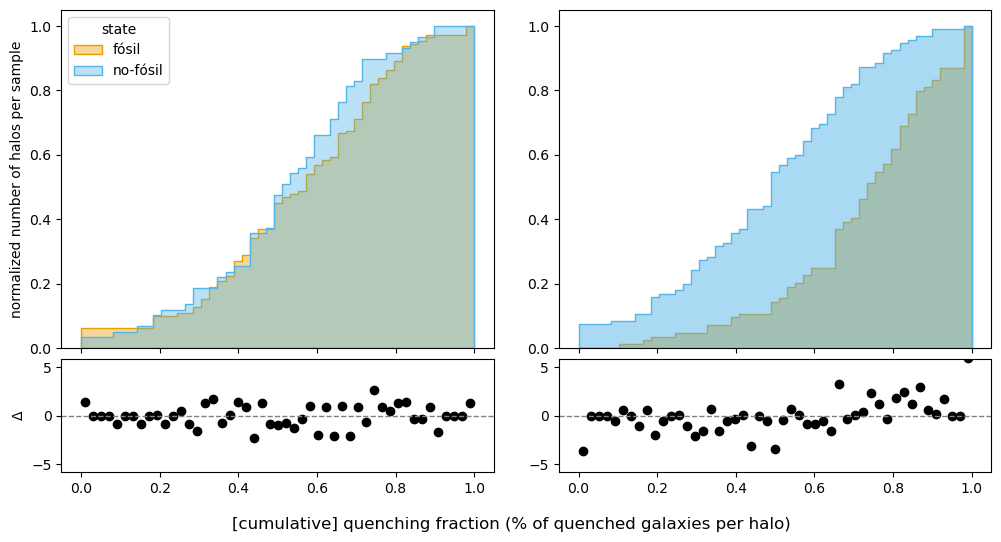

In [45]:
from matplotlib.gridspec import GridSpec

palette = {'fósil': '#E69F00', 'no-fósil': '#56B4E9'}

# Bins comunes para ambas comparaciones
bins = np.linspace(0, 1, 50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Función para calcular histograma y diferencia
def compute_hist_and_diff(df, bins):
    fosil = df[df['state'] == 'fósil']['QF']
    nofosil = df[df['state'] == 'no-fósil']['QF']
    
    h_fosil, _ = np.histogram(fosil, bins=bins, density=True)
    h_nofosil, _ = np.histogram(nofosil, bins=bins, density=True)
    
    return fosil, nofosil, h_fosil, h_nofosil, h_fosil - h_nofosil

# Calcular para ambas muestras
f05, nf05, h_f05, h_nf05, diff_05 = compute_hist_and_diff(df_05, bins)
f1, nf1, h_f1, h_nf1, diff_1 = compute_hist_and_diff(df_1, bins)

# Crear figura con 2 columnas y 2 filas
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, height_ratios=[3, 1], hspace=0.05, wspace=0.15)

# Panel 05
ax_05_main = fig.add_subplot(gs[0, 0])
ax_05_diff = fig.add_subplot(gs[1, 0], sharex=ax_05_main)

sns.histplot(f05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fósil'], label='fósil', ax=ax_05_main, 
             cumulative=True, alpha=0.4)
sns.histplot(nf05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['no-fósil'], label='no-fósil', ax=ax_05_main, 
             cumulative=True, alpha=0.4)

ax_05_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_05_diff.scatter(bin_centers, diff_05, color='black')

# Panel 1
ax_1_main = fig.add_subplot(gs[0, 1])
ax_1_diff = fig.add_subplot(gs[1, 1], sharex=ax_1_main)

sns.histplot(f1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fósil'], label='fósil', ax=ax_1_main, 
             cumulative=True, alpha=0.5)
sns.histplot(nf1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['no-fósil'], label='no-fósil', ax=ax_1_main, 
             cumulative=True, alpha=0.5)

ax_1_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_1_diff.scatter(bin_centers, diff_1, color='black')

# Etiquetas y leyenda
ax_05_main.set_ylabel('normalized number of halos per sample')
ax_05_diff.set_ylabel('Δ')
fig.supxlabel('[cumulative] quenching fraction (% of quenched galaxies per halo)')


# Limpiar etiquetas X arriba
ax_05_main.set_xlabel('')
ax_1_main.set_xlabel('')
plt.setp(ax_05_main.get_xticklabels(), visible=False)
plt.setp(ax_1_main.get_xticklabels(), visible=False)

ax_1_main.set_ylabel('')
ax_1_diff.set_ylabel('')

ax_05_diff.set_ylim(-5.8, 5.8)
ax_1_diff.set_ylim(-5.8, 5.8)
# Leyenda solo en uno
ax_05_main.legend(title='state', loc='upper left')

plt.tight_layout()
plt.show()

In [46]:
def compute_cdf_and_diff(df, bins):
    fosil = df[df['state'] == 'fósil']['QF']
    nofosil = df[df['state'] == 'no-fósil']['QF']
    
    # Histograma normalizado
    h_fosil, _ = np.histogram(fosil, bins=bins, density=True)
    h_nofosil, _ = np.histogram(nofosil, bins=bins, density=True)
    
    # CDF (suma acumulada de las proporciones)
    cdf_fosil = np.cumsum(h_fosil * np.diff(bins))
    cdf_nofosil = np.cumsum(h_nofosil * np.diff(bins))
    
    return fosil, nofosil, cdf_fosil, cdf_nofosil, cdf_fosil - cdf_nofosil

/tmp/ipykernel_29/498149320.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


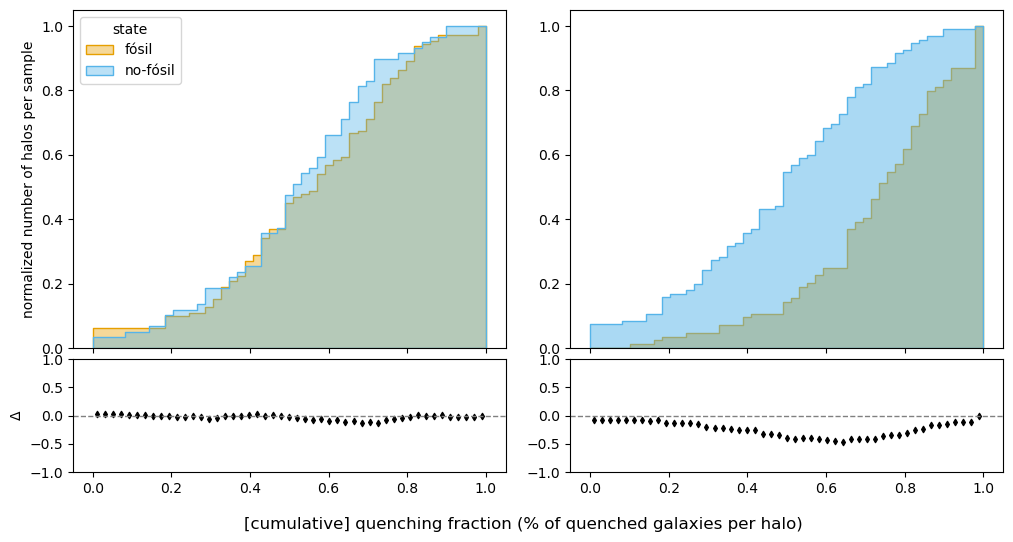

In [47]:
from matplotlib.gridspec import GridSpec

palette = {'fósil': '#E69F00', 'no-fósil': '#56B4E9'}

# Bins comunes para ambas comparaciones
bins = np.linspace(0, 1, 50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Función para calcular histograma y diferencia
def compute_cdf_and_diff(df, bins):
    fosil = df[df['state'] == 'fósil']['QF']
    nofosil = df[df['state'] == 'no-fósil']['QF']
    
    # Histograma normalizado
    h_fosil, _ = np.histogram(fosil, bins=bins, density=True)
    h_nofosil, _ = np.histogram(nofosil, bins=bins, density=True)
    
    # CDF (suma acumulada de las proporciones)
    cdf_fosil = np.cumsum(h_fosil * np.diff(bins))
    cdf_nofosil = np.cumsum(h_nofosil * np.diff(bins))
    
    return fosil, nofosil, cdf_fosil, cdf_nofosil, cdf_fosil - cdf_nofosil

# Calcular para ambas muestras con CDF
f05, nf05, cdf_f05, cdf_nf05, diff_05 = compute_cdf_and_diff(df_05, bins)
f1, nf1, cdf_f1, cdf_nf1, diff_1 = compute_cdf_and_diff(df_1, bins)


# Crear figura con 2 columnas y 2 filas
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(2, 2, height_ratios=[3, 1], hspace=0.05, wspace=0.15)

# Panel 05
ax_05_main = fig.add_subplot(gs[0, 0])
ax_05_diff = fig.add_subplot(gs[1, 0], sharex=ax_05_main)

sns.histplot(f05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fósil'], label='fósil', ax=ax_05_main, 
             cumulative=True, alpha=0.4)
sns.histplot(nf05, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['no-fósil'], label='no-fósil', ax=ax_05_main, 
             cumulative=True, alpha=0.4)

ax_05_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_05_diff.scatter(bin_centers, diff_05, color='black', s=10, marker='d')

# Panel 1
ax_1_main = fig.add_subplot(gs[0, 1])
ax_1_diff = fig.add_subplot(gs[1, 1], sharex=ax_1_main)

sns.histplot(f1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['fósil'], label='fósil', ax=ax_1_main, 
             cumulative=True, alpha=0.5)
sns.histplot(nf1, bins=bins, stat='proportion', element='step', fill=True,
             color=palette['no-fósil'], label='no-fósil', ax=ax_1_main, 
             cumulative=True, alpha=0.5)

ax_1_diff.axhline(0, color='gray', linestyle='--', linewidth=1)
ax_1_diff.scatter(bin_centers, diff_1, color='black', s=10, marker='d')


# Etiquetas y leyenda
ax_05_main.set_ylabel('normalized number of halos per sample')
ax_05_diff.set_ylabel('Δ')
fig.supxlabel('[cumulative] quenching fraction (% of quenched galaxies per halo)')


# Limpiar etiquetas X arriba
ax_05_main.set_xlabel('')
ax_1_main.set_xlabel('')
plt.setp(ax_05_main.get_xticklabels(), visible=False)
plt.setp(ax_1_main.get_xticklabels(), visible=False)

ax_1_main.set_ylabel('')
ax_1_diff.set_ylabel('')

ax_05_diff.set_ylim(-1, 1)
ax_1_diff.set_ylim(-1, 1)
# Leyenda solo en uno
ax_05_main.legend(title='state', loc='upper left')


plt.tight_layout()
plt.show()

## ks-tests

In [48]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [49]:
print(ks_2samp(QF_05_list, QF_NF05_list))
print(ks_2samp(QF_05_list, QF_NF05_list, alternative='less'))

KstestResult(statistic=0.15055733699801496, pvalue=0.30718577684410375, statistic_location=0.7222222222222222, statistic_sign=-1)
KstestResult(statistic=0.15055733699801496, pvalue=0.15410594306108763, statistic_location=0.7222222222222222, statistic_sign=-1)


In [50]:
print(ks_2samp(QF_1_list, QF_NF1_list))
print(ks_2samp(QF_1_list, QF_NF1_list, alternative='less'))

KstestResult(statistic=0.4763157894736842, pvalue=1.0531523180995112e-09, statistic_location=0.6521739130434783, statistic_sign=-1)
KstestResult(statistic=0.4763157894736842, pvalue=5.265761590496645e-10, statistic_location=0.6521739130434783, statistic_sign=-1)


## lopes+2024

In [51]:
def extract_Rnorm_sSFR_by_group(group_id, data_dict):
    """Extrae Rnorm y sSFR para un halo específico."""
    if group_id not in data_dict:
        raise KeyError(f"El halo {group_id} no está en el diccionario.")
    
    members = data_dict[group_id]
    rnorm = np.array([m['Rnorm'] for m in members])
    ssfr = np.array([m['sSFR'] for m in members])

    return rnorm, ssfr

In [52]:
def get_median_and_quartiles(values):
    """Devuelve mediana, Q1 y Q3 de un array de valores."""
    q1 = np.percentile(values, 25)
    median = np.percentile(values, 50)
    q3 = np.percentile(values, 75)
    return median, q1, q3

In [53]:
sns.set(style="whitegrid")

for group_id in F05sSFR_dict.keys():
    rnorm, ssfr = extract_Rnorm_sSFR_by_group(group_id, F05sSFR_dict)
    
    # Guardar estadísticas
    ssfr_median, ssfr_q1, ssfr_q3 = get_median_and_quartiles(ssfr)
    
    # Crear figura y eje
    plt.figure(figsize=(6, 4))
    ax = sns.scatterplot(x=rnorm, y=ssfr, color='orange', edgecolor=None, alpha=0.7)

    # Escala logarítmica en el eje y
    ax.set(yscale='log')
    ax.set_ylim(1e-15, 1e-3)

    # Ejes y título
    ax.set_xlabel('Rnorm')
    ax.set_ylabel('sSFR [yr⁻¹]')
    ax.set_title(f'Halo {group_id} - Fósil')

    # Líneas de estadísticos
    ax.axhline(ssfr_median, color='red', linestyle='--', label='median')
    ax.axhline(ssfr_q1, color='gray', linestyle=':')
    ax.axhline(ssfr_q3, color='gray', linestyle=':')

    ax.legend()

    # Guardar gráfico
    plt.tight_layout()
    plt.savefig(f'ssfr_r200/halo_{group_id}_ssfr_vs_rnorm.png')
    plt.close()


/tmp/ipykernel_29/948279937.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')
/tmp/ipykernel_29/948279937.py:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set(yscale='log')


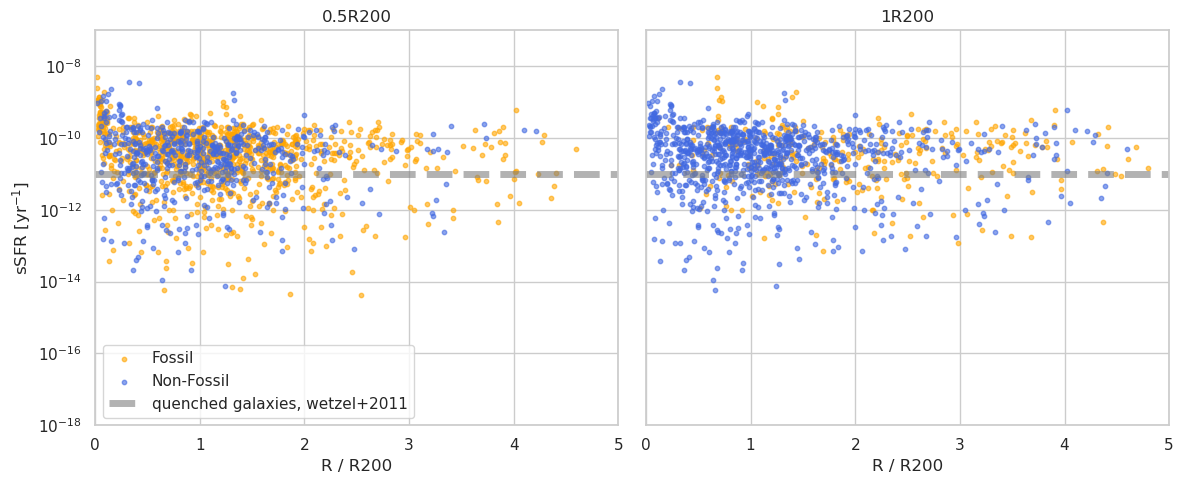

In [54]:
def extract_Rnorm_sSFR(data_dict):
    """Extrae listas de Rnorm y sSFR desde diccionario agrupado por halos."""
    rnorm_all = []
    ssfr_all = []
    for group in data_dict.values():
        for member in group:
            rnorm_all.append(member['Rnorm'])
            ssfr_all.append(member['sSFR'])
    return np.array(rnorm_all), np.array(ssfr_all)

# Extraer datos
r_f05, s_f05 = extract_Rnorm_sSFR(F05sSFR_dict)
r_nf05, s_nf05 = extract_Rnorm_sSFR(NF05sSFR_dict)
r_f1, s_f1 = extract_Rnorm_sSFR(F1sSFR_dict)
r_nf1, s_nf1 = extract_Rnorm_sSFR(NF1sSFR_dict)

# Crear figura
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Panel z = 0.5
ax[0].scatter(r_f05, s_f05, color='orange', alpha=0.6, label='Fossil', s=10)
ax[0].scatter(r_nf05, s_nf05, color='royalblue', alpha=0.6, label='Non-Fossil', s=10)
ax[0].axhline(y=1e-11, label='quenched galaxies, wetzel+2011', 
              linestyle='--', linewidth=5, color='gray', alpha=0.6)
ax[0].set_xlabel('R / R200')
ax[0].set_ylabel('sSFR [yr$^{-1}$]')
ax[0].set_title('0.5R200')
ax[0].legend()

# Panel z = 1.0
ax[1].scatter(r_f1, s_f1, color='orange', alpha=0.6, label='Fossil', s=10)
ax[1].scatter(r_nf1, s_nf1, color='royalblue', alpha=0.6, label='Non-Fossil', s=10)
ax[1].axhline(y=1e-11, label='quenched galaxies, wetzel+2011', 
              linestyle='--', linewidth=5, color='gray', alpha=0.6)
ax[1].set_xlabel('R / R200')
ax[1].set_title('1R200')

# Ajustes generales
for axis in ax:
    axis.set_xlim(0, 5)
    axis.set_ylim(1e-18, 1e-7)
    axis.set_yscale('log')

plt.tight_layout()
plt.savefig("sSFR_vs_Rnorm.png", dpi=300)  # Guarda la figura
plt.show()


## scatter binned sSFR

In [55]:
def binned_stats(x, y, bins):
    """Calcula la mediana y cuartiles de y en bins definidos por x. Devuelve además la cantidad de elementos por bin."""
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    y_median, y_q1, y_q3, counts = [], [], [], []
    for i in range(len(bins) - 1):
        in_bin = (x >= bins[i]) & (x < bins[i + 1])
        y_bin = y[in_bin]
        if len(y_bin) > 0:
            y_median.append(np.median(y_bin))
            y_q1.append(np.percentile(y_bin, 25))
            y_q3.append(np.percentile(y_bin, 75))
            counts.append(len(y_bin))
        else:
            y_median.append(np.nan)
            y_q1.append(np.nan)
            y_q3.append(np.nan)
            counts.append(0)
    return bin_centers, np.array(y_median), np.array(y_q1), np.array(y_q3), np.array(counts)


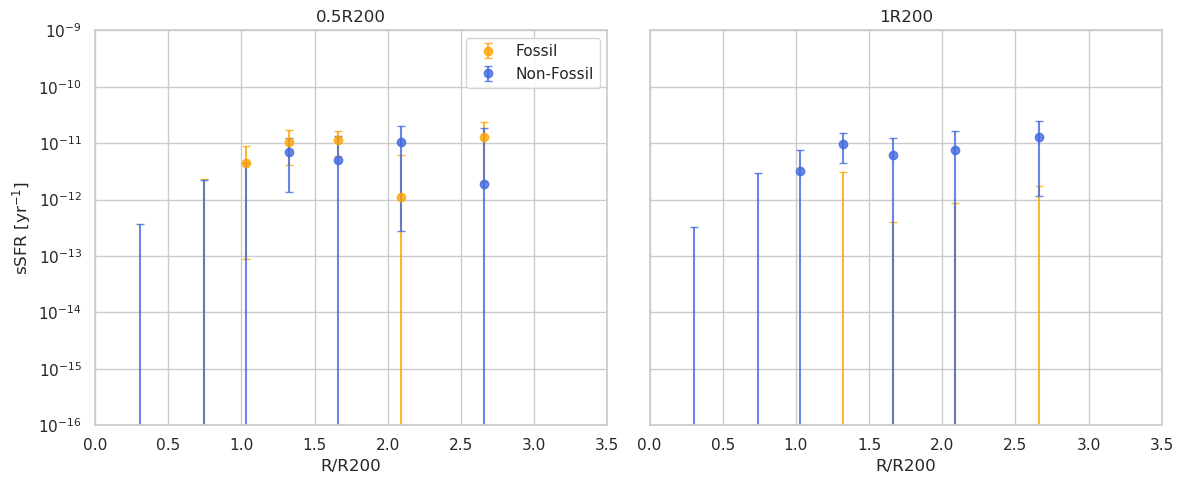

In [56]:
# Filtrar los datos entre 0 y 3
r_filtered = r_f1[(r_f1 >= 0) & (r_f1 <= 3)]

# Crear 7 bins con igual cantidad de datos entre 0 y 3
percentiles = np.linspace(0, 100, 8)  # 7 bins → 8 bordes
bins = np.percentile(r_filtered, percentiles)

# Crear figura
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Panel z = 0.5
for r, s, color, label in [
    (r_f05, s_f05, 'orange', 'Fossil'),
    (r_nf05, s_nf05, 'royalblue', 'Non-Fossil')
]:
    centers, med, q1, q3, counts = binned_stats(r, s, bins)

    iqr = q3 - q1
    sigma_med = 1.57 * iqr / np.sqrt(counts)

    sigma_med = np.where(counts > 0, sigma_med, np.nan)

    ax[0].errorbar(
        centers, med, 
        yerr=sigma_med,
        fmt='o', color=color, label=label, capsize=3, alpha=0.8
    )

ax[0].set_xlabel('R/R200')
ax[0].set_ylabel('sSFR [yr$^{-1}$]')
ax[0].set_title('0.5R200')
ax[0].legend()

# Panel z = 1.0
for r, s, color, label in [
    (r_f1, s_f1, 'orange', 'Fossil'),
    (r_nf1, s_nf1, 'royalblue', 'Non-Fossil')
]:
    centers, med, q1, q3, counts = binned_stats(r, s, bins)

    iqr = q3 - q1
    sigma_med = 1.57 * iqr / np.sqrt(counts)

    sigma_med = np.where(counts > 0, sigma_med, np.nan)

    ax[1].errorbar(
        centers, med, 
        yerr=sigma_med,
        fmt='o', color=color, label=label, capsize=3, alpha=0.8
    )
    
ax[1].set_xlabel('R/R200')
ax[1].set_title('1R200')

# Ajustes generales
for axis in ax:
    axis.set_xlim(0, 3.5)
    axis.set_ylim(1e-16, 1e-9)
    axis.set_yscale('log')

plt.tight_layout()
plt.savefig("sSFR_vs_Rnorm_binned.png", dpi=300)
plt.show()


# scatter bin SF galaxies

In [57]:
def count_high_ssfr_per_bin(r_array, s_array, bins, threshold=1e-11):
    counts = np.zeros(len(bins) - 1)
    for i in range(len(bins) - 1):
        in_bin = (r_array >= bins[i]) & (r_array < bins[i + 1])
        above_threshold = (s_array > threshold) & in_bin
        counts[i] = np.sum(above_threshold)
    return counts

def fraction_high_ssfr_per_bin(r_array, s_array, bins, threshold=1e-11):
    frac = np.zeros(len(bins) - 1)
    for i in range(len(bins) - 1):
        in_bin = (r_array >= bins[i]) & (r_array < bins[i + 1])
        total = np.sum(in_bin)
        if total > 0:
            above_threshold = (s_array > threshold) & in_bin
            frac[i] = np.sum(above_threshold) / total
        else:
            frac[i] = np.nan  # Evitar división por 0
    return frac

In [58]:
frac_f05 = fraction_high_ssfr_per_bin(r_f05, s_f05, bins)
frac_nf05 = fraction_high_ssfr_per_bin(r_nf05, s_nf05, bins)

In [59]:
frac_f1 = fraction_high_ssfr_per_bin(r_f1, s_f1, bins)
frac_nf1 = fraction_high_ssfr_per_bin(r_nf1, s_nf1, bins)

In [67]:
bins_center = 

(array([0.19927971, 0.33611111, 0.43373494, 0.50869565, 0.5060241 ,
        0.39007092, 0.51648352]),
 array([0.01020408, 0.03061224, 0.05102041, 0.07142857, 0.09183673,
        0.1122449 , 0.13265306, 0.15306122, 0.17346939, 0.19387755,
        0.21428571, 0.23469388, 0.25510204, 0.2755102 , 0.29591837,
        0.31632653, 0.33673469, 0.35714286, 0.37755102, 0.39795918,
        0.41836735, 0.43877551, 0.45918367, 0.47959184, 0.5       ,
        0.52040816, 0.54081633, 0.56122449, 0.58163265, 0.60204082,
        0.62244898, 0.64285714, 0.66326531, 0.68367347, 0.70408163,
        0.7244898 , 0.74489796, 0.76530612, 0.78571429, 0.80612245,
        0.82653061, 0.84693878, 0.86734694, 0.8877551 , 0.90816327,
        0.92857143, 0.94897959, 0.96938776, 0.98979592]))

ValueError: All arrays must be of the same length

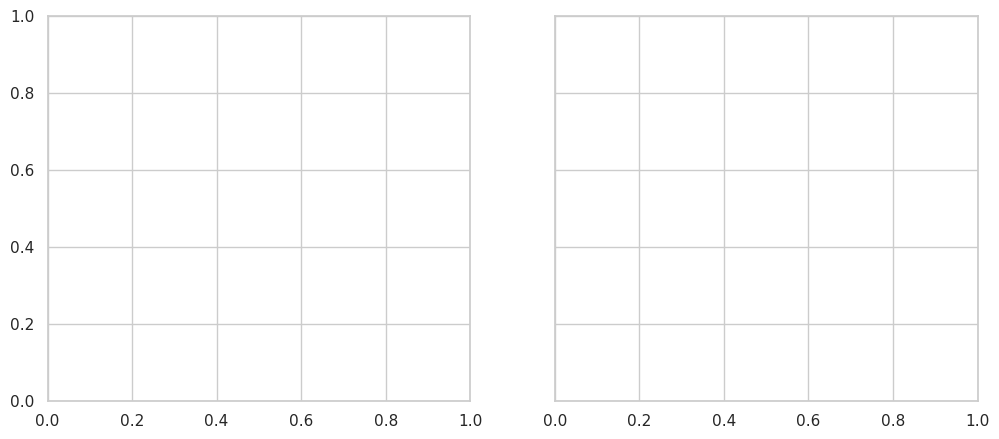

In [60]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

## --- PANEL 0.5 R200 ---

# Fossil
sns.lineplot(x=bin_centers, y=frac_f05, marker='o', 
             color='orange', label='Fossil', ax=ax[0])


# Non-Fossil
sns.lineplot(x=bin_centers, y=frac_nf05, marker='o', color='royalblue', label='Non-Fossil', ax=ax[0])

    

# Etiquetas y ajustes
ax[0].set_title('0.5 R200')
ax[0].set_xlabel('R / R200')
ax[0].set_ylabel('Fraction with sSFR > $10^{-11}$ yr$^{-1}$')
ax[0].set_ylim(0, 0.6)
ax[0].legend()

## --- PANEL 1 R200 ---


# Fossil
sns.lineplot(x=bin_centers, y=frac_f1, marker='o', color='orange', label='Fossil', ax=ax[1])

# Non-Fossil
sns.lineplot(x=bin_centers, y=frac_nf1, marker='o', color='royalblue', label='Non-Fossil', ax=ax[1])

# Etiquetas
ax[1].set_title('1 R200')
ax[1].set_xlabel('R / R200')
ax[1].legend()

# Layout y guardado
plt.tight_layout()
plt.savefig('ssfr_threshold_fraction.png', dpi=300)
plt.show()


## scatter plot with error bars

In [61]:
def binned_ssfr_fraction_stats(rnorm, ssfr, bins, threshold=1e-11, n_bootstrap=1000, seed=42):
    """Devuelve centro de bin, fracción de sSFR > threshold, Q1, Q3 y número de galaxias por bin."""
    np.random.seed(seed)
    bin_indices = np.digitize(rnorm, bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    fracs = []
    q1s = []
    q3s = []
    counts = []

    for i in range(1, len(bins)):
        in_bin = bin_indices == i
        ssfr_bin = ssfr[in_bin]
        count = len(ssfr_bin)
        counts.append(count)

        if count == 0:
            fracs.append(np.nan)
            q1s.append(np.nan)
            q3s.append(np.nan)
            continue

        # Fracción real
        frac = np.sum(ssfr_bin > threshold) / count
        fracs.append(frac)

        # Bootstrap para estimar distribución de la fracción
        boot_fracs = []
        for _ in range(n_bootstrap):
            sample = np.random.choice(ssfr_bin, size=count, replace=True)
            boot_frac = np.sum(sample > threshold) / count
            boot_fracs.append(boot_frac)

        q1s.append(np.percentile(boot_fracs, 25))
        q3s.append(np.percentile(boot_fracs, 75))

    return np.array(bin_centers), np.array(fracs), np.array(q1s), np.array(q3s), np.array(counts)


In [62]:
centers, frac_f05, q1_f05, q3_f05, n_f05 = binned_ssfr_fraction_stats(r_f05, s_f05, bins)
_,       frac_nf05, q1_nf05, q3_nf05, n_nf05 = binned_ssfr_fraction_stats(r_nf05, s_nf05, bins)
_,       frac_f1, q1_f1, q3_f1, n_f1 = binned_ssfr_fraction_stats(r_f1, s_f1, bins)
_,       frac_nf1, q1_nf1, q3_nf1, n_nf1 = binned_ssfr_fraction_stats(r_nf1, s_nf1, bins)


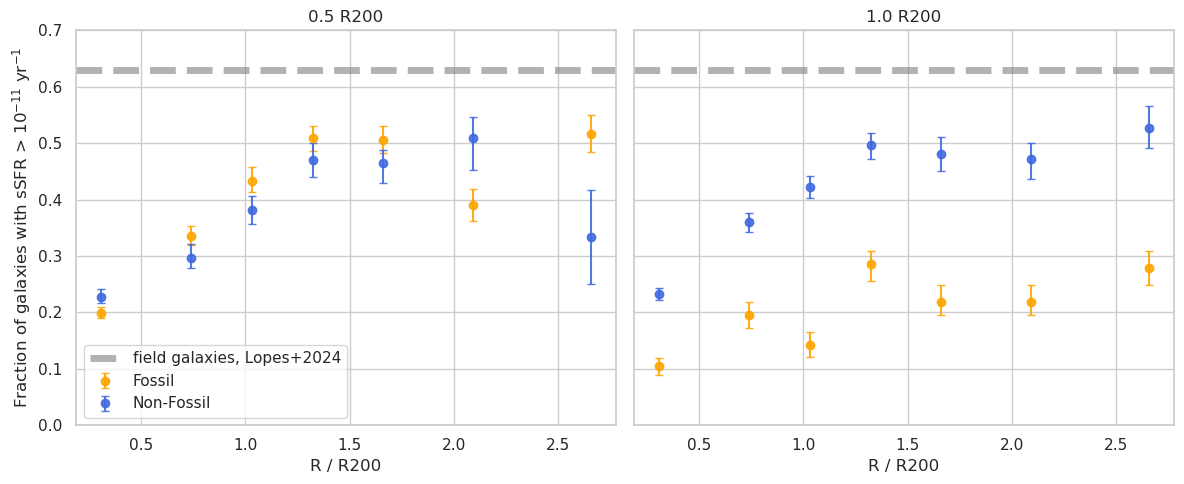

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Panel z = 0.5
for centers, frac, q1, q3, color, label in [
    (centers, frac_f05, q1_f05, q3_f05, 'orange', 'Fossil'),
    (centers, frac_nf05, q1_nf05, q3_nf05, 'royalblue', 'Non-Fossil')
]:
    yerr_lower = frac - q1
    yerr_upper = q3 - frac
    ax[0].errorbar(centers, frac, yerr=[yerr_lower, yerr_upper], 
                   fmt='o', color=color, label=label, capsize=3, alpha=0.9)
    
ax[0].set_title('0.5 R200')
ax[0].set_xlabel('R / R200')
ax[0].set_ylabel('Fraction of galaxies with sSFR > $10^{-11}$ yr$^{-1}$')
ax[0].grid(True)
ax[0].set_ylim(0, 0.7)
ax[0].axhline(y= 0.63, label='field galaxies, Lopes+2024', 
              linestyle='--', linewidth=5, color='gray', alpha=0.6)
ax[0].legend()

# Panel z = 1.0
for centers, frac, q1, q3, color, label in [
    (centers, frac_f1, q1_f1, q3_f1, 'orange', 'Fossil'),
    (centers, frac_nf1, q1_nf1, q3_nf1, 'royalblue', 'Non-Fossil')
]:
    yerr_lower = frac - q1
    yerr_upper = q3 - frac
    ax[1].errorbar(centers, frac, yerr=[yerr_lower, yerr_upper], 
                   fmt='o', color=color, label=label, capsize=3, alpha=0.9)
    
ax[1].set_title('1.0 R200')
ax[1].set_xlabel('R / R200')
ax[1].grid(True)
ax[1].set_ylim(0, 0.7)
ax[1].axhline(y= 0.63, label='field galaxies, Lopes+2024', 
              linestyle='--', linewidth=5, color='gray', alpha=0.6)


plt.tight_layout()
plt.savefig('ssfr_fraction_scatter.png', dpi=300)
plt.show()
